In [4]:
from surface_distribution import plot_surface_dist
import numpy as np
import matplotlib.pyplot as plt

Processing flair: 100%|██████████| 5951/5951 [00:13<00:00, 437.82it/s]


for flair domain, 5% have less than 1.0 of surface and more than 5% have surface grater than 3281.199999999999. min area = 1, max area = 6073


Processing t2: 100%|██████████| 5929/5929 [00:13<00:00, 440.23it/s]


for t2 domain, 5% have less than 1.0 of surface and more than 5% have surface grater than 3250.0. min area = 1, max area = 6073


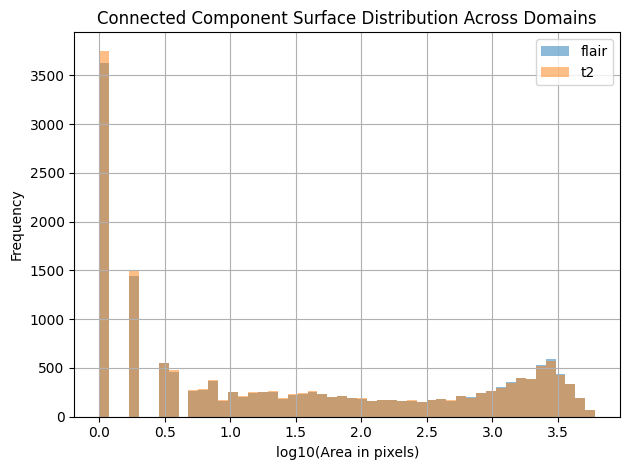

Suggested zoom interval: [4.47, 256.00]


In [ ]:
# for shape 2048 * 1024
plot_surface_dist(["flair","t2"])

Processing kvasir: 100%|██████████| 3354/3354 [00:05<00:00, 600.29it/s]


for kvasir domain, 5% have less than 540.8000000000001 of surface and more than 5% have surface grater than 55746.4. min area = 1, max area = 65536


Processing CVC: 100%|██████████| 2434/2434 [00:03<00:00, 676.51it/s]


for CVC domain, 5% have less than 1.0 of surface and more than 5% have surface grater than 22704.799999999996. min area = 1, max area = 52474


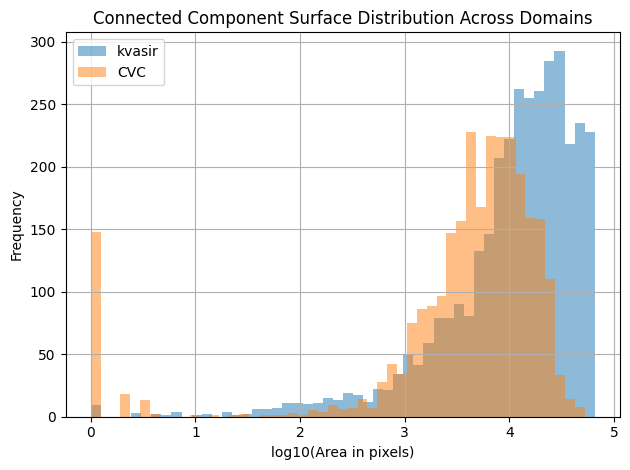

Suggested zoom interval: [1.08, 256.00]


In [83]:
# for shape 256 * 256
plot_surface_dist(["kvasir","CVC"])

In [84]:
original_shape = 256*256
min_area = 10 ** 3.5
max_area = 10 ** 4.5
print(f"min area take {min_area / original_shape * 100:.2f}%, and max area take {max_area / original_shape * 100:.2f}% of the 256 * 256 image")

min area take 4.83%, and max area take 48.25% of the 256 * 256 image


In [86]:
# to take max_area of the image
target_area = min_area

zoom_min = np.sqrt(target_area / max_area)

zoom_max = np.sqrt(target_area / min_area)

zoom_min,zoom_max

(0.31622776601683794, 1.0)

In [1]:
from mmseg.datasets.pipelines import Compose
from mmcv import Config
from PIL import Image
import os


/home/sow/venv/prism-uda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


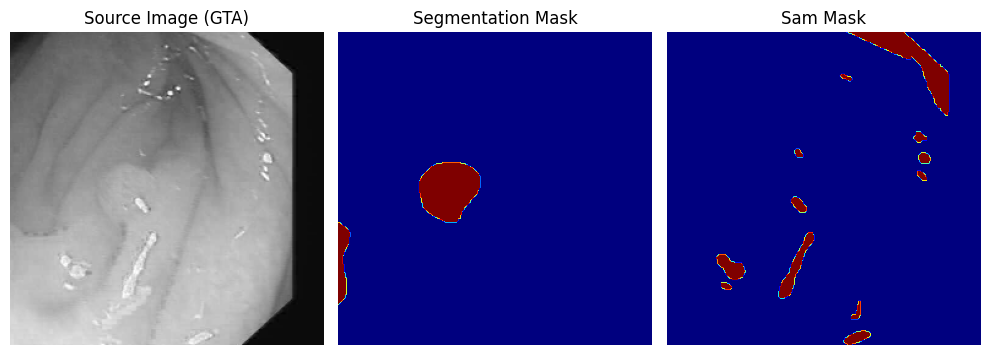

In [36]:

# Change this to match your actual path
img_path = 'data/CVC/images/4.png'
mask_path = 'data/CVC/labels/4.png'
sam_path = 'data/CVC/sam/4.png'

# Load image and mask
image = Image.open(img_path).convert('RGB')
mask = Image.open(mask_path)
sam = Image.open(sam_path)

# Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Source Image (GTA)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='jet')  
plt.title("Segmentation Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sam, cmap='jet')  
plt.title("Sam Mask")
plt.axis('off')

plt.tight_layout()
plt.show()

In [37]:
# Load your config file
cfg = Config.fromfile('configs/_base_/datasets/uda_CVCtokvasir.py')

# Build pipeline
pipeline = Compose(cfg.data.train.source.pipeline)

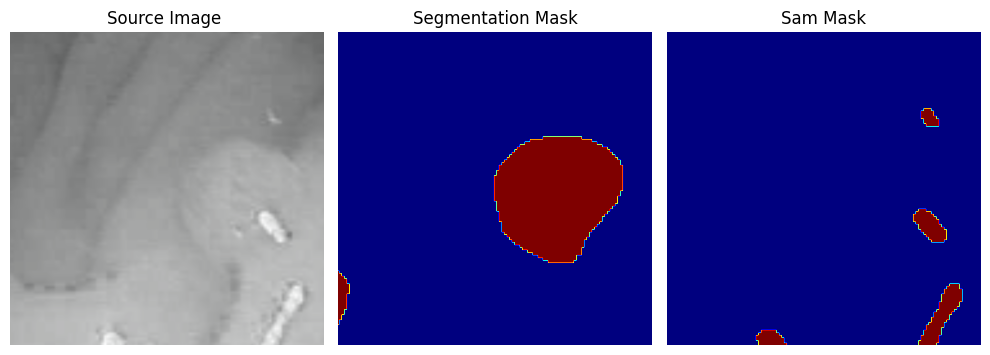

In [51]:
# Load a sample
data = dict(
    img_info=dict(filename='images/4.png'),
    ann_info=dict(seg_map='labels/4.png'),
    img_prefix='data/CVC',
    seg_prefix='data/CVC',
    pseudo_label_prefix='data/CVC',  # <--- Add this
    pseudo_label='sam/4.png',                              # <--- And this
    seg_fields=[],
    sam_fields=[]
)

# Apply pipeline
processed = pipeline(data)

# Visualize processed['img'] and processed['gt_semantic_seg']
import torch
import numpy as np

img = processed['img'].data.numpy().transpose(1, 2, 0)  # [C, H, W] -> [H, W, C]
img = (img * cfg.img_norm_cfg['std']) + cfg.img_norm_cfg['mean']  # denormalize
img = img.astype(np.uint8)

mask = processed['gt_semantic_seg'].data.squeeze().numpy()

sam = processed["sam_pseudo_label"].data.squeeze().numpy()

# Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Source Image ")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='jet')  
plt.title("Segmentation Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sam, cmap='jet')  
plt.title("Sam Mask")
plt.axis('off')

plt.tight_layout()
plt.show()


In [55]:
scores = {
    "PRISM UDA": {
        "mitochondria": {
            "IoU": [0.41, 0.58, 0.83, 0.69, 0.80, 0.78],
            "Dice": [0.47, 0.68, 0.88, 0.77, 0.85, 0.83]
        },
        "polyp": {
            "IoU": [0.79, 0.77],
            "Dice": [0.85, 0.83]
        },
        "brats": {
            "IoU": [0.38, 0.32],
            "Dice": [0.50, 0.43]
        }
    },
    "MGCA": {
        "mitochondria": {
            "IoU": [0.41, 0.53, 0.41, 0.49, 0.73, 0.63],
            "Dice": [0.46, 0.63, 0.42, 0.61, 0.77, 0.70]
        },
        "polyp": {
            "IoU": [0.75, 0.70],
            "Dice": [0.82, 0.79]
        },
        "brats": {
            "IoU": [0.42, 0.32],
            "Dice": [0.53, 0.43]
        }
    },
    "U-Net + Transformer": {
        "mitochondria": {
            "IoU": [0.48, 0.45, 0.50, 0.54, 0.74, 0.66],
            "Dice": [0.54, 0.58, 0.53, 0.65, 0.84, 0.72]
        },
        "polyp": {
            "IoU": [0.75, 0.77],
            "Dice": [0.82, 0.84]
        },
        "brats": {
            "IoU": [0.24, 0.20],
            "Dice": [0.35, 0.30]
        }
    },
    "TransUNet": {
        "mitochondria": {
            "IoU": [0.65, 0.22, 0.67, 0.22, 0.61, 0.28],
            "Dice": [0.70, 0.32, 0.74, 0.34, 0.69, 0.37]
        },
        "polyp": {
            "IoU": [0.56, 0.64],
            "Dice": [0.68, 0.73]
        },
        "brats": {
            "IoU": [0.12, 0.38],
            "Dice": [0.19, 0.48]
        }
    },
    "Separation": {
        "mitochondria": {
            "IoU": [0.63, 0.08, 0.79, 0.19, 0.49, 0.43],
            "Dice": [0.70, 0.13, 0.84, 0.25, 0.57, 0.51]
        },
        "polyp": {
            "IoU": [0.56, 0.44],
            "Dice": [0.66, 0.56]
        },
        "brats": {
            "IoU": [0.33, 0.25],
            "Dice": [0.45, 0.36]
        }
    },
    "Random Fusion": {
        "mitochondria": {
            "IoU": [0.77, 0.16, 0.80, 0.14, 0.61, 0.59],
            "Dice": [0.80, 0.26, 0.83, 0.22, 0.66, 0.64]
        },
        "polyp": {
            "IoU": [0.63, 0.64],
            "Dice": [0.72, 0.73]
        },
        "brats": {
            "IoU": [0.37, 0.55],
            "Dice": [0.48, 0.64]
        }
    }
}

# Calcul des moyennes et écarts-types
for method, datasets in scores.items():
    print(f"\nMéthode : {method}")
    all_iou = []
    all_dice = []
    for dataset, metrics in datasets.items():
        iou_mean = np.mean(metrics["IoU"])
        iou_std = np.std(metrics["IoU"])
        dice_mean = np.mean(metrics["Dice"])
        dice_std = np.std(metrics["Dice"])

        all_iou.extend(metrics["IoU"])
        all_dice.extend(metrics["Dice"])

        print(f"  {dataset} - IoU : {iou_mean:.2f} ± {iou_std:.2f}, Dice : {dice_mean:.2f} ± {dice_std:.2f}")

    # Moyenne globale tous datasets confondus
    print(f"  Global  - IoU : {np.mean(all_iou):.2f} ± {np.std(all_iou):.2f}, Dice : {np.mean(all_dice):.2f} ± {np.std(all_dice):.2f}")



Méthode : PRISM UDA
  mitochondria - IoU : 0.68 ± 0.15, Dice : 0.75 ± 0.14
  polyp - IoU : 0.78 ± 0.01, Dice : 0.84 ± 0.01
  brats - IoU : 0.35 ± 0.03, Dice : 0.46 ± 0.04
  Global  - IoU : 0.64 ± 0.19, Dice : 0.71 ± 0.17

Méthode : MGCA
  mitochondria - IoU : 0.53 ± 0.12, Dice : 0.60 ± 0.12
  polyp - IoU : 0.72 ± 0.03, Dice : 0.80 ± 0.01
  brats - IoU : 0.37 ± 0.05, Dice : 0.48 ± 0.05
  Global  - IoU : 0.54 ± 0.15, Dice : 0.62 ± 0.14

Méthode : U-Net + Transformer
  mitochondria - IoU : 0.56 ± 0.10, Dice : 0.64 ± 0.11
  polyp - IoU : 0.76 ± 0.01, Dice : 0.83 ± 0.01
  brats - IoU : 0.22 ± 0.02, Dice : 0.32 ± 0.02
  Global  - IoU : 0.53 ± 0.19, Dice : 0.62 ± 0.18

Méthode : TransUNet
  mitochondria - IoU : 0.44 ± 0.20, Dice : 0.53 ± 0.18
  polyp - IoU : 0.60 ± 0.04, Dice : 0.71 ± 0.02
  brats - IoU : 0.25 ± 0.13, Dice : 0.33 ± 0.14
  Global  - IoU : 0.44 ± 0.20, Dice : 0.52 ± 0.20

Méthode : Separation
  mitochondria - IoU : 0.43 ± 0.24, Dice : 0.50 ± 0.24
  polyp - IoU : 0.50 ± 0.06, D

In [57]:
import numpy as np

results = {
    "DAFormer": {
        "mitochondria": {
            "IoU": [0.22, 0.12, 0.15, 0.10, 0.66, 0.26],
            "Dice": [0.31, 0.20, 0.21, 0.18, 0.72, 0.39]
        },
        "polyp": {
            "IoU": [0.73, 0.64],
            "Dice": [0.80, 0.71]
        },
        "brats": {
            "IoU": [0.14, 0.24],
            "Dice": [0.22, 0.33]
        }
    },
    "HRDA": {
        "mitochondria": {
            "IoU": [0.13, 0.26, 0.22, 0.24, 0.76, 0.73],
            "Dice": [0.21, 0.30, 0.24, 0.35, 0.84, 0.82]
        },
        "polyp": {
            "IoU": [0.78, 0.74],
            "Dice": [0.83, 0.81]
        },
        "brats": {
            "IoU": [0.31, 0.46],
            "Dice": [0.43, 0.58]
        }
    },
    "MIC": {
        "mitochondria": {
            "IoU": [0.20, 0.16, 0.50, 0.15, 0.62, 0.44],
            "Dice": [0.29, 0.26, 0.58, 0.23, 0.71, 0.55]
        },
        "polyp": {
            "IoU": [0.52, 0.70],
            "Dice": [0.60, 0.77]
        },
        "brats": {
            "IoU": [0.17, 0.22],
            "Dice": [0.26, 0.32]
        }
    }
}

# Calcul des moyennes et écarts-types
for method, datasets in results.items():
    print(f"\nMéthode : {method}")
    all_iou = []
    all_dice = []
    for dataset, metrics in datasets.items():
        iou_mean = np.mean(metrics["IoU"])
        iou_std = np.std(metrics["IoU"])
        dice_mean = np.mean(metrics["Dice"])
        dice_std = np.std(metrics["Dice"])

        all_iou.extend(metrics["IoU"])
        all_dice.extend(metrics["Dice"])

        print(f"  {dataset} - IoU : {iou_mean:.2f} ± {iou_std:.2f}, Dice : {dice_mean:.2f} ± {dice_std:.2f}")

    # Moyenne globale tous datasets confondus
    print(f"  Global  - IoU : {np.mean(all_iou):.2f} ± {np.std(all_iou):.2f}, Dice : {np.mean(all_dice):.2f} ± {np.std(all_dice):.2f}")



Méthode : DAFormer
  mitochondria - IoU : 0.25 ± 0.19, Dice : 0.33 ± 0.19
  polyp - IoU : 0.69 ± 0.04, Dice : 0.76 ± 0.05
  brats - IoU : 0.19 ± 0.05, Dice : 0.28 ± 0.06
  Global  - IoU : 0.33 ± 0.24, Dice : 0.41 ± 0.23

Méthode : HRDA
  mitochondria - IoU : 0.39 ± 0.25, Dice : 0.46 ± 0.27
  polyp - IoU : 0.76 ± 0.02, Dice : 0.82 ± 0.01
  brats - IoU : 0.39 ± 0.08, Dice : 0.51 ± 0.07
  Global  - IoU : 0.46 ± 0.25, Dice : 0.54 ± 0.25

Méthode : MIC
  mitochondria - IoU : 0.34 ± 0.18, Dice : 0.44 ± 0.18
  polyp - IoU : 0.61 ± 0.09, Dice : 0.69 ± 0.09
  brats - IoU : 0.20 ± 0.02, Dice : 0.29 ± 0.03
  Global  - IoU : 0.37 ± 0.20, Dice : 0.46 ± 0.20


In [76]:
0.37 / 0.82

0.45121951219512196

In [71]:
supervised = {
    "supervised": {
        "mitochondria": {
            "IoU": [0.84 , 0.81, 0.84, 0.81, 0.92, 0.92],
            "Dice": [0.91, 0.89, 0.91, 0.89, 0.96, 0.96]
        },
        "polyp": {
            "IoU": [0.79, 0.85],
            "Dice": [0.86, 0.91]
        },
        "brats": {
            "IoU": [0.71, 0.76],
            "Dice": [0.86, 0.90]
        }
    }
}
for method, datasets in supervised.items():
    print(f"\nMéthode : {method}")
    all_iou = []
    all_dice = []
    for dataset, metrics in datasets.items():
        iou_mean = np.mean(metrics["IoU"])
        iou_std = np.std(metrics["IoU"])
        dice_mean = np.mean(metrics["Dice"])
        dice_std = np.std(metrics["Dice"])

        all_iou.extend(metrics["IoU"])
        all_dice.extend(metrics["Dice"])

        print(f"  {dataset} - IoU : {iou_mean:.2f} ± {iou_std:.2f}, Dice : {dice_mean:.2f} ± {dice_std:.2f}")

    # Moyenne globale tous datasets confondus
    print(f"  Global  - IoU : {np.mean(all_iou):.2f} ± {np.std(all_iou):.2f}, Dice : {np.mean(all_dice):.2f} ± {np.std(all_dice):.2f}")



Méthode : supervised
  mitochondria - IoU : 0.86 ± 0.05, Dice : 0.92 ± 0.03
  polyp - IoU : 0.82 ± 0.03, Dice : 0.89 ± 0.03
  brats - IoU : 0.73 ± 0.03, Dice : 0.88 ± 0.02
  Global  - IoU : 0.82 ± 0.06, Dice : 0.91 ± 0.03
